## Temporal Alignment

Align the stock data with news articles based on dates to correlate market movements with news sentiment.

#### import data

In [15]:
import pandas as pd

In [16]:
df_stocks = pd.read_csv('data/stocks/df_stocks.csv', sep=",", index_col=0)
df_text = pd.read_csv('data/textual/df_text_Sentiment.csv', sep=",", index_col=0)


In [17]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

In [18]:
df_stocks.head(2)

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,2010-01-04,AAPL,7.660714,7.585,7.643214,6.479,493729600.0,1,NaN,NaN
1,2010-01-04,AMZN,6.830500,6.657,6.695000,6.695,151998000.0,1,NaN,NaN


In [19]:
df_text.head(2)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,Sentiment Scores,Compound Score,Overall Sentiment,Month-Year,Sentiment Score,Processed Description
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133,"Jason Stauffer,Brett Holzhauer","{'neg': 0.069, 'neu': 0.744, 'pos': 0.187, 'co...",0.6486,Positive,2019-10,0.9995,analyzed balance transfer card using average a...
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,"Select: Credit Cards,Select_Monetized,Credit c...",If you lack a credit history or have poor cred...,1468,"Benji Stawski,Alexandria White","{'neg': 0.06, 'neu': 0.544, 'pos': 0.396, 'com...",0.9072,Positive,2019-10,0.9999,analyzed credit card marketed toward consumer ...


In [20]:
# Let's ensure both datasets are aligned in terms of the date format
df_stocks['Date'] = df_stocks['Date'].dt.date
df_text['date'] = df_text['date'].dt.date

# Merge the datasets based on the date
df = pd.merge(df_text, df_stocks, left_on='date', right_on='Date', how='outer')
df.head(3)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,...,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,AAPL,59.412498,58.720001,58.830002,57.142513,87360000.0,10.0,-0.233174,-0.002332
1,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,AMZN,88.822502,87.030998,88.369003,88.369003,62234000.0,10.0,1.782393,0.017824
2,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,GOOG,62.366501,61.020000,62.150501,62.150501,27634000.0,10.0,2.125479,0.021255


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53657 entries, 0 to 53656
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    44373 non-null  object 
 1   softTitle              44373 non-null  object 
 2   title                  44373 non-null  object 
 3   date                   44373 non-null  object 
 4   author                 43476 non-null  object 
 5   description            44265 non-null  object 
 6   keywords               42617 non-null  object 
 7   text                   44373 non-null  object 
 8   Article Length         44373 non-null  float64
 9   Combined Authors       43476 non-null  object 
 10  Sentiment Scores       44373 non-null  object 
 11  Compound Score         44373 non-null  float64
 12  Overall Sentiment      44373 non-null  object 
 13  Month-Year             44373 non-null  object 
 14  Sentiment Score        44373 non-null  float64
 15  Pr

In [22]:
df.isnull().sum()

url                       9284
softTitle                 9284
title                     9284
date                      9284
author                   10181
description               9392
keywords                 11040
text                      9284
Article Length            9284
Combined Authors         10181
Sentiment Scores          9284
Compound Score            9284
Overall Sentiment         9284
Month-Year                9284
Sentiment Score           9284
Processed Description     9392
Date                      1119
Stock                     1119
Open                      1119
Low                       1119
Close                     1119
Adjusted_Close            1119
Volume                    1119
Month                     1119
Price_Change_Pct          1124
Adjusted_Close_Change     1124
dtype: int64

In [23]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
url,9284,0.173025
softTitle,9284,0.173025
title,9284,0.173025
date,9284,0.173025
author,10181,0.189742
description,9392,0.175038
keywords,11040,0.205751
text,9284,0.173025
Article Length,9284,0.173025
Combined Authors,10181,0.189742


#### looking at distribution to decide between mean/medium 

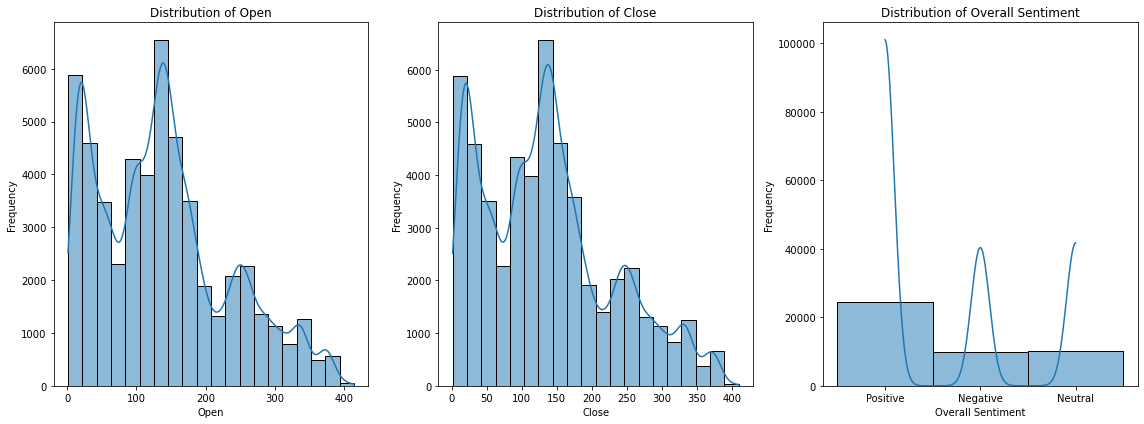

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_num contains multiple columns you want to plot
columns_to_plot = ['Open', 'Close', 'Overall Sentiment']  # Replace these with your actual column names

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))  # Adjust the figsize as needed

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [27]:
## replace null values with Median
import numpy as np

df['Open'] = df['Open'].fillna(df['Open'].median())
df['Close'] = df['Close'].fillna(df['Close'].median())

In [28]:
df.isnull().sum()

url                       9284
softTitle                 9284
title                     9284
date                      9284
author                   10181
description               9392
keywords                 11040
text                      9284
Article Length            9284
Combined Authors         10181
Sentiment Scores          9284
Compound Score            9284
Overall Sentiment         9284
Month-Year                9284
Sentiment Score           9284
Processed Description     9392
Date                      1119
Stock                     1119
Open                         0
Low                       1119
Close                        0
Adjusted_Close            1119
Volume                    1119
Month                     1119
Price_Change_Pct          1124
Adjusted_Close_Change     1124
dtype: int64

delete all the days where an aritlces wan't published 

also figure out how to ttake care of thet null values